# 2장. 지도 학습

In [1]:
class CFG:
    SEED = 42

In [2]:
import random
import os
import numpy as np
#seed 고정
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [3]:
# # 노트북이 코랩에서 실행 중인지 체크합니다.
# import os
# import sys
# if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
#     # 사이킷런 최신 버전을 설치합니다.
#     !pip install -q --upgrade scikit-learn
#     # mglearn을 다운받고 압축을 풉니다.
#     !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
#     !tar -xzf mglearn.tar.gz
#     !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
#     !tar -xzf data.tar.gz
#     # 나눔 폰트를 설치합니다.
#     !sudo apt-get -qq -y install fonts-nanum
#     import matplotlib.font_manager as fm
#     fm._rebuild()

In [4]:

# 나눔 폰트를 사용합니다.
# from preamble import *
import matplotlib
# from preamble import *
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
font_name = matplotlib.font_manager.FontProperties(fname=path).get_name()
# 나눔 폰트를 사용합니다.
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
# # 코랩에서 넘파이 경고를 나타내지 않기 위해
# import sys
# if 'google.colab' in sys.modules:
#     import warnings
#     warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

## 2.1 분류와 회귀
## 2.2 일반화, 과대적합, 과소적합
### 2.2.1 모델 복잡도와 데이터셋 사이즈의 관계

## 2.3 지도 학습 알고리즘

In [5]:
X= pd.read_csv('./train.csv')
y = pd.read_csv('./test.csv')

In [6]:
y

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A
171,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A
172,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G
173,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A


In [7]:
compare = pd.read_csv('./answer/submit.csv')
logis_compare = pd.read_csv('./answer/LogisticReg_submit.csv')

In [8]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score
import seaborn as sns

In [9]:
# 재활용1
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
X_train, y_train = get_x_y(X)
X_test = get_x_y(y)

In [10]:
X_train.replace("A A", 1, inplace=True)
X_train.replace("A G", 2, inplace= True)
X_train.replace("G A", 3, inplace= True)
X_train.replace("G G", 4, inplace= True)
X_train.replace("A C", 5, inplace= True)
X_train.replace("C A", 6, inplace= True)
X_train.replace("C C", 7, inplace= True)
X_test.replace("A A", 1, inplace=True)
X_test.replace("A G", 2, inplace= True)
X_test.replace("G A", 3, inplace= True)
X_test.replace("G G", 4, inplace= True)
X_test.replace("A C", 5, inplace= True)
X_test.replace("C A", 6, inplace= True)
X_test.replace("C C", 7, inplace= True)

### 2.3.2 k-최근접 이웃
#### k-최근접 이웃 분류

In [11]:
from sklearn.model_selection import train_test_split
# X_train, y = mglearn.datasets.make_forge()

# X_train, X_test, y_train, y_test = train_test_split(X_train, y, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
print("테스트 세트 예측:", clf.predict(X_test))


테스트 세트 예측: ['A' 'B' 'C' 'B' 'A' 'B' 'C' 'B' 'A' 'A' 'C' 'B' 'B' 'A' 'B' 'B' 'A' 'B'
 'B' 'C' 'B' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'B' 'C' 'A' 'B'
 'C' 'B' 'B' 'C' 'A' 'B' 'C' 'B' 'B' 'B' 'B' 'C' 'B' 'C' 'A' 'B' 'A' 'B'
 'B' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'C' 'C' 'A' 'B' 'A' 'A' 'B' 'B' 'B'
 'A' 'A' 'C' 'B' 'C' 'B' 'B' 'B' 'C' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'C' 'A'
 'B' 'B' 'B' 'B' 'B' 'C' 'A' 'B' 'A' 'C' 'A' 'B' 'B' 'C' 'A' 'A' 'C' 'B'
 'A' 'B' 'C' 'B' 'B' 'B' 'B' 'A' 'A' 'C' 'B' 'C' 'A' 'B' 'B' 'C' 'C' 'B'
 'B' 'B' 'A' 'B' 'A' 'A' 'B' 'B' 'B' 'C' 'A' 'A' 'B' 'A' 'A' 'A' 'C' 'B'
 'B' 'B' 'A' 'B' 'C' 'A' 'A' 'B' 'A' 'B' 'B' 'A' 'A' 'B' 'C' 'A' 'B' 'C'
 'C' 'B' 'A' 'A' 'C' 'B' 'B' 'A' 'B' 'C' 'C' 'B' 'B']


C:\Users\ppjjh\anaconda3\envs\language\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:

submit = pd.read_csv('./sample_submission.csv')

In [16]:
# 재활용2
submit['class'] = clf.predict(X_test)
cm2 = confusion_matrix(compare['class'],submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)','실제값(C)']
                     , columns=['예측값(A)', '예측값(B)','예측값(C)']
                     )

submit.to_csv('./answer/knn_submit.csv', index=False)
cmdf2

C:\Users\ppjjh\anaconda3\envs\language\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,85,1
실제값(C),0,2,36


In [17]:
y_test = compare['class']

In [18]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.98


C:\Users\ppjjh\anaconda3\envs\language\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 2.3.3. 선형 모델
#### 회귀의 선형 모델

#### 선형 회귀(최소제곱법)

#### 분류용 선형 모델

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [20]:
y_pred = LogisticRegression(max_iter=5000).fit(X_train, y_train).predict(X_test)


In [21]:
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(logis_compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/LogisticReg_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,85,0
실제값(C),0,0,39


In [22]:
idx_num = []

In [62]:
y_pred = LogisticRegression(
             penalty = "l2",
             # *,
             dual = False,
             tol = 1e-4,
             C = 5.45,
             fit_intercept = True,
             intercept_scaling = 1,
             class_weight = None,
             random_state = CFG.SEED,
             solver = "lbfgs",
             # max_iter: Any = 100,
             multi_class = "auto",
             verbose = 0,
             warm_start = False,
             n_jobs = None,
             l1_ratio = None,
            max_iter=5000
                             ).fit(X_train, y_train).predict(X_test)

# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(logis_compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )
submit.to_csv('./answer/LogisticReg_again_submit.csv', index=False)
# cmdf2

is_same = logis_compare["class"] != y_pred
for idx, value in enumerate(is_same) :
    if value :
        idx_num.append(idx)
        print(idx)
# y_pred

14
126


In [63]:
pd.concat([logis_compare['class'], submit['class']], axis=1)

,class,class
0,A,A
1,B,B
2,C,C
3,C,C
4,A,A
...,...,...
170,B,B
171,C,C
172,C,C
173,B,B


In [153]:
# y_pred[3] = 'B'
# y_pred[119] = 'B'

In [154]:
# 3,119는 항상 C로 판단되는데 이걸 B로 바꾸면 어떨까 궁금해짐
# submit['class'] = y_pred
# submit.to_csv('./answer/test_manually_mod_submit.csv', index=False)


In [142]:
# set(idx_num)

{3, 14, 60, 103, 119, 126, 162}

### 2.3.4 나이브 베이즈 분류기

In [20]:
from sklearn.naive_bayes import CategoricalNB

# 나이브 베이즈 모델 선언 및 학습
model = CategoricalNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/CategoricalNB_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,85,1
실제값(C),0,0,38


In [22]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [23]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### 장단점과 매개변수

### 2.3.5 결정 트리

#### 결정 트리 만들기

In [24]:
from sklearn.tree import DecisionTreeClassifier

# cancer = load_breast_cancer()
# X_train, X_test, y_train, y_test = train_test_split(
#     cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.949


In [25]:
y_pred = tree.predict(X_test)

In [26]:
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/Decision_again_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,78,8
실제값(C),0,1,37


In [27]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.920
테스트 세트 정확도: 0.966


In [28]:
y_pred = tree.predict(X_test)

In [29]:
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/Decision_again_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,86,0
실제값(C),0,6,32


#### 결정 트리 분석

In [30]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.56784953 0.         0.
 0.         0.04694219 0.12406657 0.         0.         0.
 0.         0.21770824 0.         0.         0.         0.04343347
 0.        ]


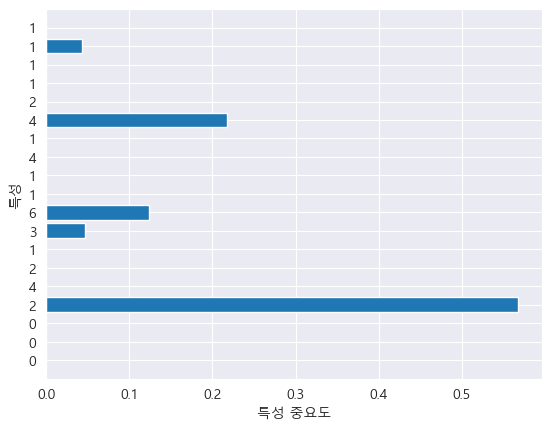

In [31]:
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.iloc[0,:])
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

### 2.3.6 결정 트리의 앙상블
#### 랜덤 포레스트
##### 랜덤 포레스트 구축
##### 랜덤 포레스트 분석

In [32]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_moons

# X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(
#     cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
# print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/RandomForest_again_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,86,0
실제값(C),0,0,38


ValueError: The number of FixedLocator locations (19), usually from a call to set_ticks, does not match the number of ticklabels (262).

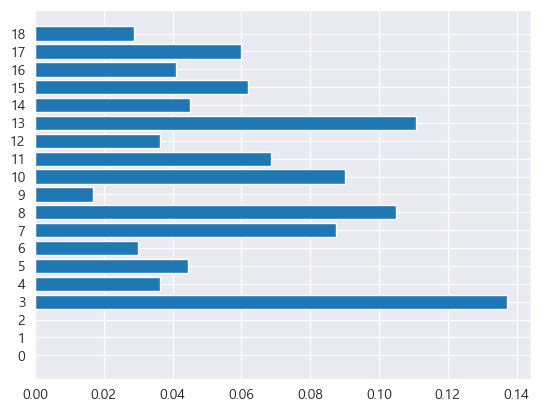

In [95]:
plot_feature_importances_cancer(forest)

##### 장단점과 매개변수

#### 그래디언트 부스팅 회귀 트리

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# X_train, X_test, y_train, y_test = train_test_split(
#     cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
# print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

In [35]:
y_pred = forest.predict(X_test)
# print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/Gradient_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,86,0
실제값(C),0,0,38


In [36]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

# print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

GradientBoostingClassifier(max_depth=1, random_state=0)

In [37]:
y_pred = forest.predict(X_test)
# print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/Gradient_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,86,0
실제값(C),0,0,38


In [62]:
gbrt = GradientBoostingClassifier(random_state=28, learning_rate=0.2, n_estimators=10, max_depth=1)
gbrt.fit(X_train, y_train)

# print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
y_pred = forest.predict(X_test)
# print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/Gradient_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,86,0
실제값(C),0,0,38


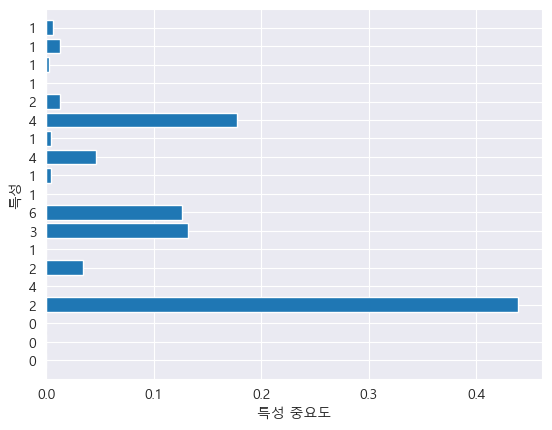

In [40]:
gbrt = GradientBoostingClassifier(random_state=28, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

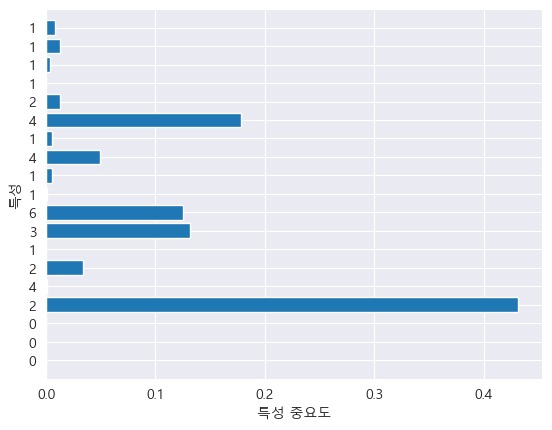

In [61]:
gbrt = GradientBoostingClassifier(random_state=28
                                  , learning_rate=0.2
                                  , n_estimators=100
                                  , max_depth=1
                                  )
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)